# lab 3. Data Preprocessing

In [1]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Data import
df = pd.read_csv(join('data','bikeshare.csv'))
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# 데이터를 전체적으로 보기 위해 사용한다.
# noise는 없는지 확인
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Numpy slicing
- Numpy는 오직 정수형 index로 slicing이 가능하다

In [12]:
np_data = np.array(df) # Pandas to Numpy array
print('np_data shape : {}'.format(np_data.shape))
tmp = np_data[:,1] # tmp column 
print('tem shape : {}'.format(tmp.shape))
print(tmp)


np_data shape : (10886, 12)
tem shape : (10886,)
[1 1 1 ... 4 4 4]


## Normalization

### 1. MinMax scaler
- 모든 값을 0과 1사이로 scale
- 변환 공식
- X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
- X_scaled = X_std * (max - min) + min

In [5]:
## MinMax Normalization
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Self example
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
data = np.array(data)
print(data)
scaler = MinMaxScaler()
# fit method : Compute the minimum and maximum to be used for later scaling.
scaler.fit(data)
# min과 max는 axis=0 기준 즉 행 기준
print('data max : {}'.format(scaler.data_max_))
print('data min : {}'.format(scaler.data_min_))
minmax_result = scaler.transform(data)
print(minmax_result)

[[-1.   2. ]
 [-0.5  6. ]
 [ 0.  10. ]
 [ 1.  18. ]]
data max : [ 1. 18.]
data min : [-1.  2.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [32]:
scaler = MinMaxScaler()
scaler.fit(np_data[:,5].reshape(-1,1)) # 5번째 columns을  column vector로 
scale_result = scaler.transform(np_data[:,5].reshape(-1,1))

np.set_printoptions(precision=3)
print('column vector : \n{}'.format(np_data[:,5].reshape(-1,1)))
print('scale result : \n{}'.format(scale_result))
print('scale before min max')
print('min : {} max : {}'.format(scaler.data_min_,scaler.data_max_))
print('scale after min max')
print('min : {} max : {}'.format(np.min(scale_result),np.max(scale_result)))

column vector : 
[[9.84]
 [9.02]
 [9.02]
 ...
 [13.94]
 [13.94]
 [13.12]]
scale result : 
[[0.224]
 [0.204]
 [0.204]
 ...
 [0.327]
 [0.327]
 [0.306]]
scale before min max
min : [0.82] max : [41.]
scale after min max
min : 0.0 max : 1.0


### 2. Standard Normalization
- 모든 값을 평균이 0 표준편차가 1인이 되도록 scale
- 변환 공식

- $z = \frac{x - u}{s}$

In [33]:
from sklearn.preprocessing import StandardScaler

### Example 

In [45]:
# data preparation
data = np.array([[0, 0], [0, 0], [1, 1], [1, 1]])
print(data)
scaler = StandardScaler()
# fit - Compute the mean and var to be used for later scaling.
scaler.fit(data)
print('mean : {} std : {}'.format(scaler.mean_,scaler.var_))
# z - transform
scaled_data = scaler.transform(data)
print('scaled data : \n{}'.format(scaled_data))

print(scaler.transform([[2, 2]]))

[[0 0]
 [0 0]
 [1 1]
 [1 1]]
mean : [0.5 0.5] std : [0.25 0.25]
scaled data : 
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


In [37]:
scaler = StandardScaler()
scale_result = scaler.fit_transform(np_data[:,5].reshape(-1,1))
print('scale result : \n{}'.format(scale_result))

np.set_printoptions(precision=3)
print('mean , std before scale')
print('mean : {} std : {}'.format(np.mean(np_data[:,5]),
                                  np.std(np_data[:,5])))

print('mean , std after scale')
print('mean : {} std : {}'.format(np.mean(scale_result),
                                  np.std(scale_result)))


scale result : 
[[-1.334]
 [-1.439]
 [-1.439]
 ...
 [-0.807]
 [-0.807]
 [-0.913]]
mean , std before scale
mean : 20.230859819952173 std : 7.791231963738185
mean , std after scale
mean : 3.133019595488224e-16 std : 1.0


## Binary Transform
- Binarize data (set feature values to 0 or 1) according to a threshold.
- 연속형 변수의 데이터를 특정 threshold를 기준으로 Binary로 변환하는 기능을 제공

In [46]:
from sklearn.preprocessing import Binarizer

In [54]:
binarizer = Binarizer(threshold=10)
result_binary = binarizer.transform(np_data[:,5].reshape(-1,1))
print('original data : \n{}'.format(np.array(np_data[:,5])))
print("=======================================")
print('binary result : \n{}'.format(result_binary))

original data : 
[9.84 9.02 9.02 ... 13.94 13.94 13.12]
binary result : 
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


## One Hot Encoding

### 1. Pandas - get_dummies() 이용 

In [64]:
print('original seanson data : ') # dtype - int64
df['season']

original seanson data : 


0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

In [65]:
one_hot_encoidng = pd.get_dummies(df['season'])

In [66]:
one_hot_encoidng.head(5)

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [67]:
one_hot_encoidng.tail(5)

,1,2,3,4
10881,0,0,0,1
10882,0,0,0,1
10883,0,0,0,1
10884,0,0,0,1
10885,0,0,0,1


### 2. Sklearn OneHotEncoder

In [68]:
from sklearn.preprocessing import OneHotEncoder

### Example
Given a dataset with two features, we let the encoder find the unique values per feature and transform the data to a binary one-hot encoding.

In [71]:
enc = OneHotEncoder(handle_unknown='ignore')

# The data to determine the categories of each feature.
X = [['Male', 1], ['Female', 3], ['Female', 2]]
print(X)
# Fit OneHotEncoder to X.
enc.fit(X) # feature의 개수를 센다.
enc.categories_


[['Male', 1], ['Female', 3], ['Female', 2]]


[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [72]:
# Transform X using one-hot encoding.
# return : Transformed input. 
# If sparse=True, a sparse matrix will be returned.
enc.transform([['Female', 1], ['Male', 4]]).toarray()
# 결과를 보면 4는 위의 fit에서의 categories에 포함되어 있지 않기 때문에 0 0 0 으로 표시

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [73]:
enc.transform([['neural', 1], ['Male', 4]]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [74]:
enc.transform([['neural', 1], ['Male', 3]]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.]])

In [75]:
enc.transform([['neural', 1], ['Male', 2]]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

# Missing value imputation

In statistics, imputation is the process of replacing missing data with substituted values.

In [77]:
from sklearn.impute import SimpleImputer

In [80]:
X = [[1,2],[np.nan,3],[7,6],[3,2]]
X = np.array(X)
print(X)

[[ 1.  2.]
 [nan  3.]
 [ 7.  6.]
 [ 3.  2.]]


In [81]:
# strategy - mean : 각 missing value가 있는 칼럼의 평균으로 대체 
imp = SimpleImputer(missing_values=np.nan,strategy='mean')
# Fit the imputer on X.
imp.fit(X)
# Impute all missing values in X.
imputed_X = imp.transform(X)
print(imputed_X)

[[1.    2.   ]
 [3.667 3.   ]
 [7.    6.   ]
 [3.    2.   ]]


In [82]:
# strategy - constant : 특정 값으로 missing value 대체
imp = SimpleImputer(missing_values=np.nan,strategy='constant',
                    fill_value=-99)
imp.fit(X)
imputed_X = imp.transform(X)
print(imputed_X)

[[  1.   2.]
 [-99.   3.]
 [  7.   6.]
 [  3.   2.]]


### nan이 포함된 euclidean distance 계산
공식 

$ dst(x,y) = \sqrt{weight * SquaredDistanceFromPresentCoordinates}$  

$ weight = \frac{Total Number of coordinates}{Number of present coordinates}$

**For example**

(3, NA, 5) and (1, 0, 0) 

$ dst(x,y) = \sqrt{\frac{3}{2}(3-1)^2 + (5-0)^2} = 6.595454$



In [85]:
# nan이 포함된 euclidean distance 계산
from sklearn.metrics.pairwise import nan_euclidean_distances
X = np.array([[0, 1], [1, np.nan]])
print(X)
nan_euclidean_distances(X, X) # distance between rows of X

[[ 0.  1.]
 [ 1. nan]]


array([[0.   , 1.414],
       [1.414, 0.   ]])

In [86]:
X = np.array([[3,np.nan,5],[1,0,0]])
nan_euclidean_distances(X, X)

array([[0.   , 6.595],
       [6.595, 0.   ]])

In [89]:
X = np.array([[1,2],[np.nan,3],[7,6],[3,2]])
print(X)
nan_euclidean_distances(X, X)

[[ 1.  2.]
 [nan  3.]
 [ 7.  6.]
 [ 3.  2.]]


array([[0.   , 1.414, 7.211, 2.   ],
       [1.414, 0.   , 4.243, 1.414],
       [7.211, 4.243, 0.   , 5.657],
       [2.   , 1.414, 5.657, 0.   ]])

In [90]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2,weights="uniform")
imputed_X = imputer.fit_transform(X)
print(imputed_X)
# 값이 2로 채워짐

[[1. 2.]
 [2. 3.]
 [7. 6.]
 [3. 2.]]


##  Log Transform

(array([64., 15., 11.,  3.,  4.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.165,  3.107,  6.048,  8.99 , 11.932, 14.874, 17.815, 20.757,
        23.699, 26.641, 29.583]),
 <BarContainer object of 10 artists>)

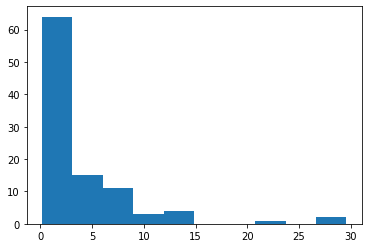

In [94]:
x = np.random.normal(loc=1,scale=1,size=(100,1)) # 평균 1 분산 1 shape 100 x 1
x = np.exp(x)
plt.hist(x)

(array([ 5.,  2.,  5., 13., 22., 20., 13., 11.,  6.,  3.]),
 array([-1.803, -1.284, -0.765, -0.246,  0.273,  0.792,  1.311,  1.83 ,
         2.349,  2.868,  3.387]),
 <BarContainer object of 10 artists>)

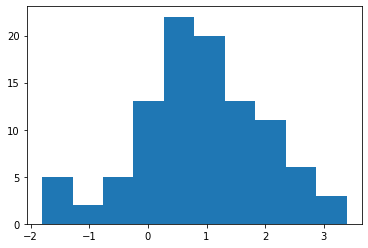

In [95]:
x2 = np.log(x)
plt.hist(x2)

## Merge

In [96]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
print(a)
print(b)

[[1 2]
 [3 4]]
[[5 6]]


In [97]:
# 행 기준으로 밑으로 합침
print(np.concatenate((a,b),axis=0))

[[1 2]
 [3 4]
 [5 6]]


In [99]:
# 열 기준으로 옆으로 합침
print(np.concatenate((a,b.T),axis=1))

[[1 2 5]
 [3 4 6]]


In [102]:
# flatten 단순히 값을 1차원으로 나열
print(np.concatenate((a,b),axis=None))

[1 2 3 4 5 6]


## Outlier Detection


In [113]:
x = np.random.normal(1,1,size=(100,2))
print(x.shape)
x[99,0] = 10
x[99,1] = 10

(100, 2)


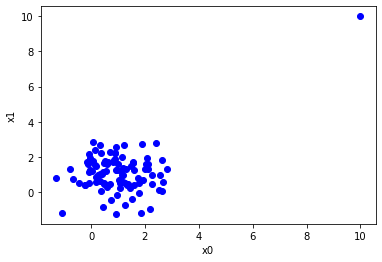

In [115]:
plt.xlabel('x0')
plt.ylabel('x1')
plt.plot(x[:,0],x[:,1],'ob')

In [110]:
# 각 축의 평균 표준편차 구하기
x0_mean = np.mean(x[:,0])
x0_std = np.std(x[:,0])
x1_mean = np.mean(x[:,1])
x1_std = np.std(x[:,1])
print('x0 mean : {} x0 std : {}'.format(x0_mean,x0_std))
print('x1 mean : {} x1 std : {}'.format(x1_mean,x1_std))

x0 mean : 0.9736446115537634 x0 std : 1.369517738858915
x1 mean : 1.0602923585847166 x1 std : 1.32715579071246


In [111]:
# outlier detection 
# 값이 평균 + 3시그마 보다 크면 outlier로 판단
print(np.where(x[:,0] > (x0_mean + 3*x0_std)))
print(np.where(x[:,1] > (x1_mean + 3*x1_std)))

(array([99]),)
(array([99]),)


## LOF 알고리즘을 이용한 Outlier detection

Unsupervised Outlier Detection using Local Outlier Factor (LOF)


The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

각 표본의 이상 점수를 로컬 특이치 요인이라고 합니다. 이 값은 주어진 표본의 인접 표본에 대한 밀도 로컬 편차를 측정합니다. 이상 징후 점수는 개체가 주변 이웃에 대해 얼마나 격리되어 있는지에 따라 달라진다는 점에서 국지적이다. 더 정확히 말하면, 지역밀도를 추정하기 위해 거리를 사용하는 가장 가까운 이웃에 의해 지역성이 주어진다. 표본의 국소 밀도를 이웃의 국소 밀도와 비교함으로써, 이웃보다 밀도가 상당히 낮은 표본을 식별할 수 있다. 이들은 특이치로 간주됩니다.

In [121]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)

# fit_predict : Returns -1 for anomalies/outliers and 1 for inliers.
y_pred = clf.fit_predict(x)

# negative_outlier_factor_ 의미 
# The opposite LOF of the training samples. The higher, the more normal. 
# Inliers tend to have a LOF score close to 1 
# (negative_outlier_factor_ close to -1), 
# while outliers tend to have a larger LOF score.
x_scores = clf.negative_outlier_factor_
print('y_pred  shape : {} y_pred : \n{}'.format(y_pred.shape,y_pred))
print('x_scores shape : {} x_scores : \n{}'.format(x_scores.shape,x_scores))

y_pred  shape : (100,) y_pred : 
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1 -1  1 -1]
x_scores shape : (100,) x_scores : 
[ -1.024  -0.998  -0.96   -0.959  -1.041  -1.201  -1.473  -1.081  -1.161
  -1.058  -1.311  -1.161  -1.107  -1.03   -1.078  -0.959  -1.197  -1.328
  -1.246  -1.042  -0.905  -1.371  -1.132  -0.984  -0.984  -1.028  -1.055
  -1.144  -0.977  -0.929  -3.148  -1.539  -1.715  -1.073  -1.149  -0.982
  -1.063  -1.108  -1.023  -0.982  -1.032  -1.019  -1.013  -1.132  -1.079
  -1.211  -1.035  -1.033  -1.041  -1.197  -1.014  -1.196  -0.988  -1.222
  -0.956  -1.069  -1.066  -1.021  -0.949  -1.     -1.069  -1.19   -1.089
  -0.996  -0.982  -1.185  -1.019  -1.036  -1.157  -1.006  -1.111  -1.484
  -0.982  -1.41   -1.015  -1.091  -1.213 

In [122]:
# outliers 판단을 위한 통계적 접근
outlier_idx = np.where(x_scores < (np.mean(x_scores) - 3*np.std(x_scores)))
print('outlier idx : {}'.format(outlier_idx))

outlier idx : (array([99]),)


/Users/daebak/Desktop/tensorflow/lib/python3.7/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


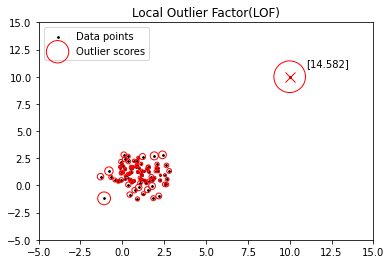

In [127]:
# outlier 시각적 표현
plt.title('Local Outlier Factor(LOF)')
# x0,x1을 scatter
plt.scatter(x[:,0],x[:,1],color='k',s=3,label='Data points')

# 모든 점에 빨간색 반경을 그린다. outlier일수록 그 반경이 크다.
radius = (x_scores.max() - x_scores) / (x_scores.max() - x_scores.min())
plt.scatter(x[:,0],x[:,1],s=1000*radius,edgecolors='r',facecolors='none',
           label='Outlier scores')

# (99,99)좌표에 'x'표시 마크를 새긴다
plt.plot(x[outlier_idx,0],x[outlier_idx,1],'xr',markersize=10)
# 주석을 단다.
plt.annotate(text=np.abs(x_scores[outlier_idx]),xy=(x[outlier_idx,0],
                                                    x[outlier_idx,1]),
            xytext=(x[outlier_idx,0] + 1, x[outlier_idx,1] + 1))
plt.axis('tight')
plt.xlim((-5,15))
plt.ylim((-5,15))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._size = [10]
legend.legendHandles[1]._size = [1]
plt.show()

## Feature Creation



In [128]:
x1 = np.sin(100) + np.random.normal(0,0.1,size=(100,1))
x2 = np.sin(10) + np.random.normal(0,0.1,size=(10,1))

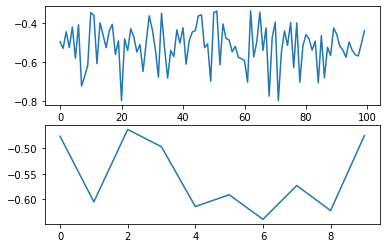

In [130]:
fig,(ax1,ax2) = plt.subplots(2)
ax1.plot(x1)
ax2.plot(x2)